In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Universities.csv')
df.head(3)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72


In [4]:
df.drop (['Univ'],axis=1,inplace=True)

<Axes: >

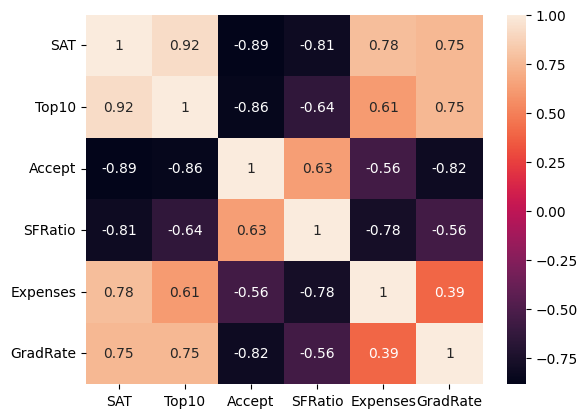

In [13]:
sns.heatmap(df.corr(),annot=True)

In [5]:
wss = []
from sklearn.cluster import KMeans
for i in range (1,10):
    kmeans = KMeans(n_clusters=i)

    kmeans = kmeans.fit(df)

    wss.append(kmeans.inertia_)

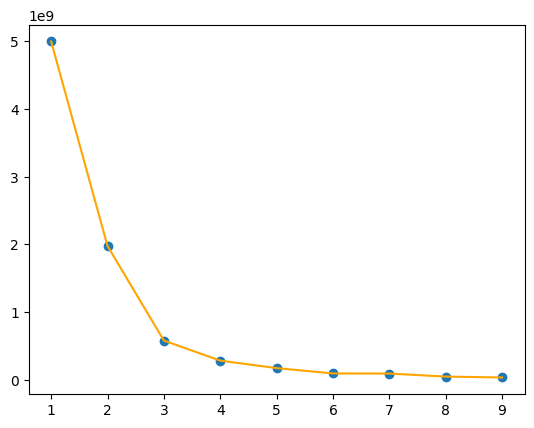

In [7]:
plt.scatter(range(1,10),wss)
plt.plot(range(1,10),wss,color='orange')

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(df)

Text(0, 0.5, 'SFRatio')

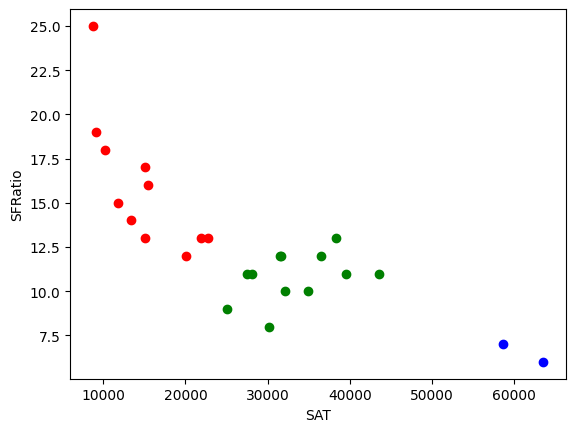

In [16]:
plt.scatter(df['Expenses'][kmeans.labels_==0],df['SFRatio'][kmeans.labels_==0],color='red')
plt.scatter(df['Expenses'][kmeans.labels_==1],df['SFRatio'][kmeans.labels_==1],color='green')
plt.scatter(df['Expenses'][kmeans.labels_==2],df['SFRatio'][kmeans.labels_==2],color='blue')
plt.xlabel('SAT')
plt.ylabel('SFRatio')

In [17]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo = agglo.fit(df)

Text(0, 0.5, 'SFRatio')

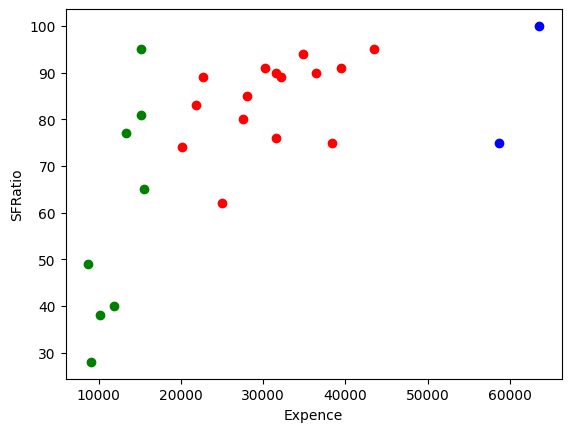

In [19]:
plt.scatter(df['Expenses'][agglo.labels_==0],df['Top10'][agglo.labels_==0],color='red')
plt.scatter(df['Expenses'][agglo.labels_==1],df['Top10'][agglo.labels_==1],color='green')
plt.scatter(df['Expenses'][agglo.labels_==2],df['Top10'][agglo.labels_==2],color='blue')
plt.xlabel('Expence')
plt.ylabel('SFRatio')

In [51]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4000)
dbscan = dbscan.fit(df)

Text(0, 0.5, 'Expenses')

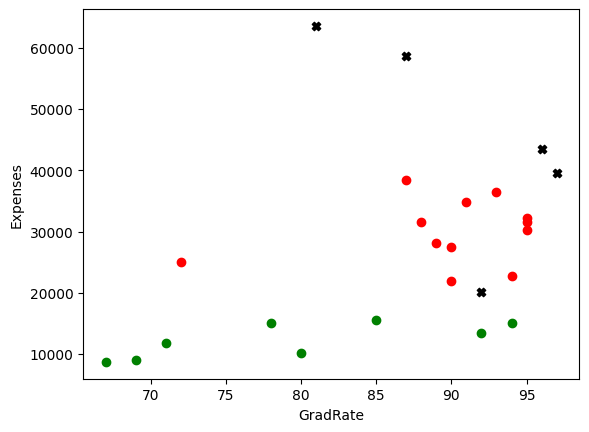

In [52]:
plt.scatter(df['GradRate'][dbscan.labels_==0],df['Expenses'][dbscan.labels_==0],color='red')
plt.scatter(df['GradRate'][dbscan.labels_==1],df['Expenses'][dbscan.labels_==1],color='green')
plt.scatter(df['GradRate'][dbscan.labels_==2],df['Expenses'][dbscan.labels_==2],color='blue')
plt.scatter(df['GradRate'][dbscan.labels_==-1],df['Expenses'][dbscan.labels_==-1],color='black',marker='X')
plt.xlabel('GradRate')
plt.ylabel('Expenses')